## Import Libraries and Data

In [1]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/MasterDataset_OT_DoE_10-14-03-23.csv', firstRow=162, lastRow=168)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_130323_S163-168.csv',t_baseline=25,derivNoise=0.005,secDerivNoise=0.001)

## Analyse Water Addition

In [2]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=5)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=84s and ended at t=498s; mass=44.837799999999994g
This equals a volume of 44.928m; expected was 45.141mL; error is 0.474%


## Analyse Surfactants

Peak threshold for 1st derivative = 0.001 g/s and for 2nd derivative = 0.0002 g/s^2


<IPython.core.display.Javascript object>


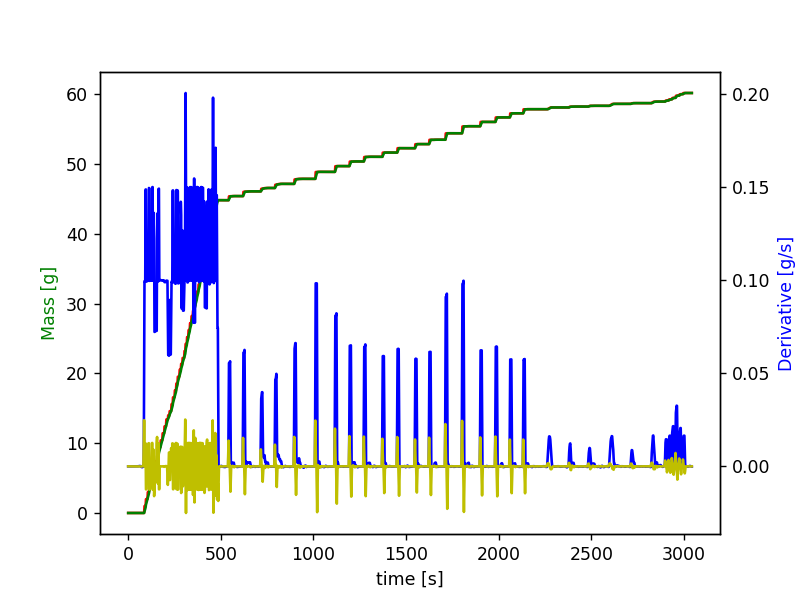

Addition of 0.595g Plantapon ACG 50 detected from 538s to 578s - expected volume = 0.562mL and actual volume = 0.529mL (resulting error is 5.945%)
Addition of 0.679g Plantapon ACG 50 detected from 616s to 666s - expected volume = 0.562mL and actual volume = 0.604mL (resulting error is 7.415%)
Addition of 0.487g Plantacare 818 detected from 712s to 762s - expected volume = 0.518mL and actual volume = 0.45mL (resulting error is 13.191%)
Addition of 0.595g Plantacare 818 detected from 788s to 834s - expected volume = 0.518mL and actual volume = 0.549mL (resulting error is 6.061%)
Addition of 0.72g Plantacare 2000 detected from 892s to 954s - expected volume = 0.795mL and actual volume = 0.665mL (resulting error is 16.302%)
Addition of 1.007g Dehyton MC detected from 1006s to 1040s - expected volume = 0.987mL and actual volume = 0.933mL (resulting error is 5.418%)
Addition of 0.83g Dehyton PK 45 detected from 1112s to 1140s - expected volume = 0.811mL and actual volume = 0.781mL (resulting

In [3]:
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=10, specType='surfactant', steps=steps,start_idx=t1,show=True)

## Analyse Polyelectrolytes

Peak threshold for 1st derivative = 0.00125 g/s and for 2nd derivative = 0.00025 g/s^2


<IPython.core.display.Javascript object>


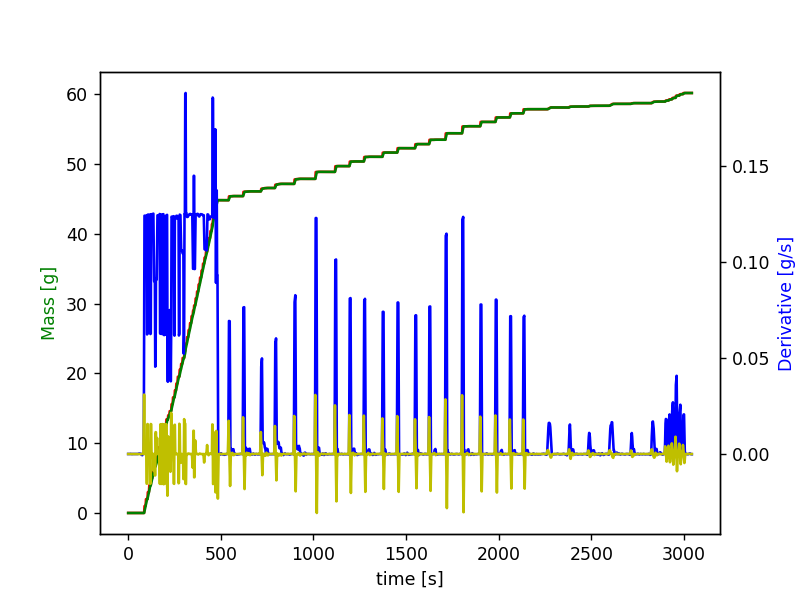

Addition of 0.26g Luviquat Excellence detected from 2258s to 2290s - expected volume = 0.264mL and actual volume = 0.236mL (resulting error is 10.345%)
Addition of 0.14g Luviquat Excellence detected from 2374s to 2410s - expected volume = 0.111mL and actual volume = 0.125mL (resulting error is 12.2%)
Addition of 0.119g Luviquat Excellence detected from 2478s to 2520s - expected volume = 0.096mL and actual volume = 0.108mL (resulting error is 12.976%)
Addition of 0.278g Luviquat Excellence detected from 2592s to 2630s - expected volume = 0.26mL and actual volume = 0.254mL (resulting error is 2.456%)
Addition of 0.104g Luviquat Excellence detected from 2708s to 2738s - expected volume = 0.089mL and actual volume = 0.093mL (resulting error is 3.875%)
Addition of 0.229g Luviquat Excellence detected from 2820s to 2860s - expected volume = 0.201mL and actual volume = 0.207mL (resulting error is 2.984%)


In [4]:
# default bl_mult = 5, default mergeSens = 5
t3 = massProfile.analyseIngredients(avg_window=4, bl_mult=5, mergeSens=5, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

## Analyse Thickeners

Peak threshold for 1st derivative = 0.005 g/s and for 2nd derivative = 0.001 g/s^2


<IPython.core.display.Javascript object>


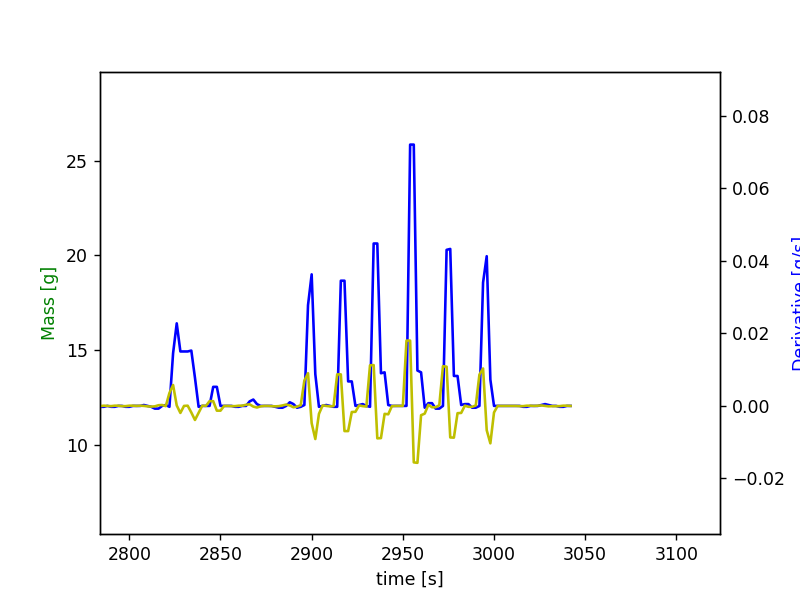

Addition of 0.145g Arlypon TT detected from 2894s to 2908s - expected volume = 0.173mL and actual volume = 0.151mL (resulting error is 12.424%)
Addition of 0.166g Arlypon TT detected from 2912s to 2928s - expected volume = 0.152mL and actual volume = 0.17mL (resulting error is 11.824%)
Addition of 0.217g Arlypon TT detected from 2930s to 2946s - expected volume = 0.199mL and actual volume = 0.228mL (resulting error is 14.55%)
Addition of 0.328g Arlypon TT detected from 2950s to 2966s - expected volume = 0.337mL and actual volume = 0.345mL (resulting error is 2.181%)
Addition of 0.205g Arlypon TT detected from 2970s to 2986s - expected volume = 0.167mL and actual volume = 0.211mL (resulting error is 26.543%)
Addition of 0.163g Arlypon TT detected from 2990s to 3004s - expected volume = 0.14mL and actual volume = 0.17mL (resulting error is 21.642%)


In [5]:
t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=5, mergeSens=1, specType='thickener',steps=steps,start_idx=t3,show=True)

## Consolidate results and create output

In [ ]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/FreshlyAnalysed_130323_S157-S162.csv', index=False)
actualMassFractions